In [105]:
from math import *
def rotate_60_cntclk(x,y):
    return (1/2*x-sqrt(3)/2*y, 1/2*y + sqrt(3)/2*x)
def generate_vertices(A, E, iterations):
    vertices = [A,E]
    jump = 1
    for i in range(iterations):
        real_index = 0
        for j in range(len(vertices) - 1):
            ax, ay = vertices[real_index]
            ex, ey = vertices[real_index + 1]
            bx = (2*ax+ex)/3
            by = (2*ay+ey)/3
            dx = (ax+2*ex)/3
            dy = (ay+2*ey)/3
            vx = dx - bx
            vy = dy - by
            vx, vy = rotate_60_cntclk(vx, vy)
            cx = bx + vx
            cy = by + vy
            B = (bx, by)
            C = (cx, cy)
            D = (dx, dy)
            vertices.insert(real_index+1, D)
            vertices.insert(real_index+1, C)
            vertices.insert(real_index+1, B)
            real_index = real_index + 4
    return vertices

In [120]:
import plotly.graph_objects as go
def draw_curve(points, title): # creates and displays a plotly figure with a polygonal chain made from specified list of points (pairs)
    x_coords, y_coords = zip(*points)
    min_val = min(min(x_coords), min(y_coords))
    max_val = max(max(x_coords), max(y_coords))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_coords, y=y_coords, mode='lines',  line=dict(width=2)))
    fig.update_layout(
        title=title,
        xaxis=dict(scaleanchor="y"), 
        yaxis=dict(scaleanchor="x"),  
        showlegend=False
    )
    fig.show()
def insert_curve(points, fig): #adds polygonal chain to a already existing figure
    x_coords, y_coords = zip(*points)
    fig.add_trace(go.Scatter(x=x_coords, y=y_coords, mode='lines',  line=dict(width=2)))

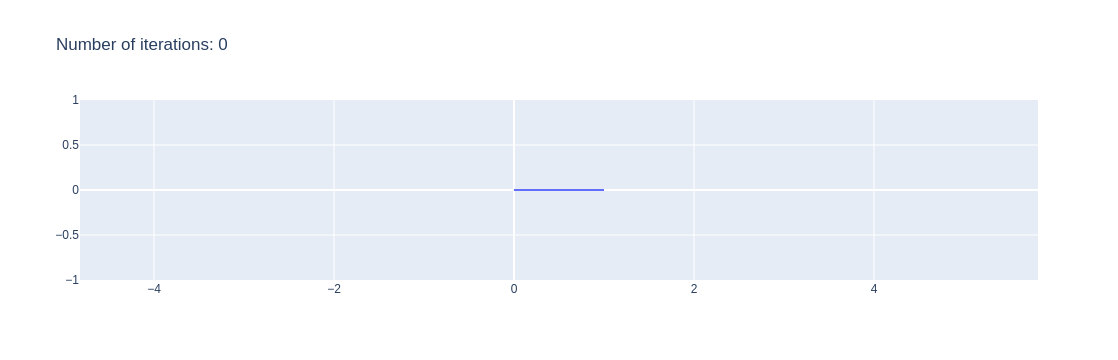

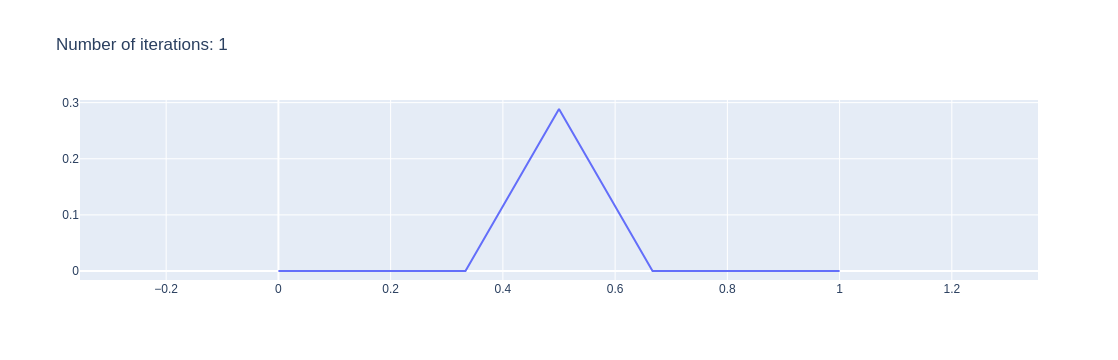

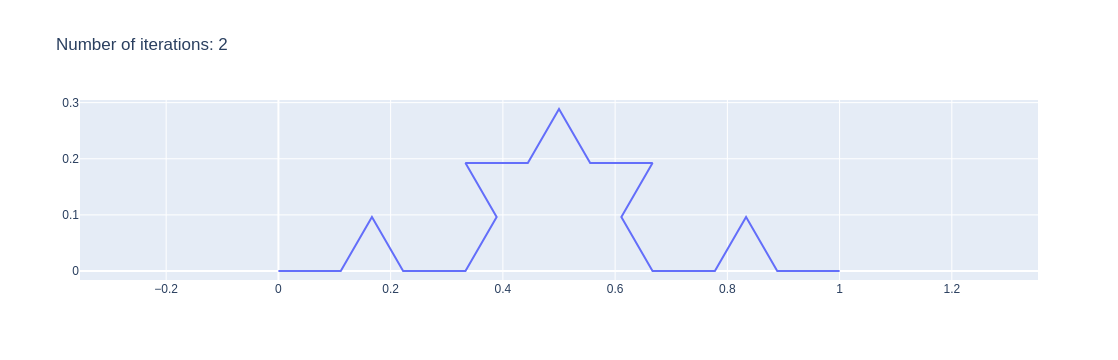

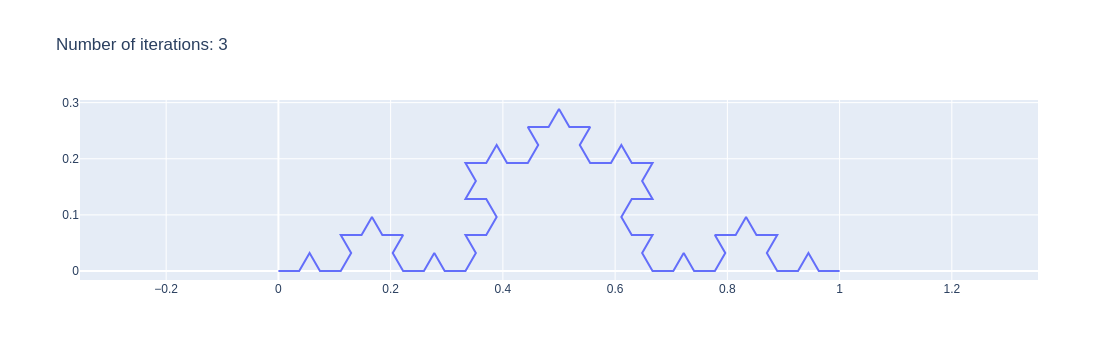

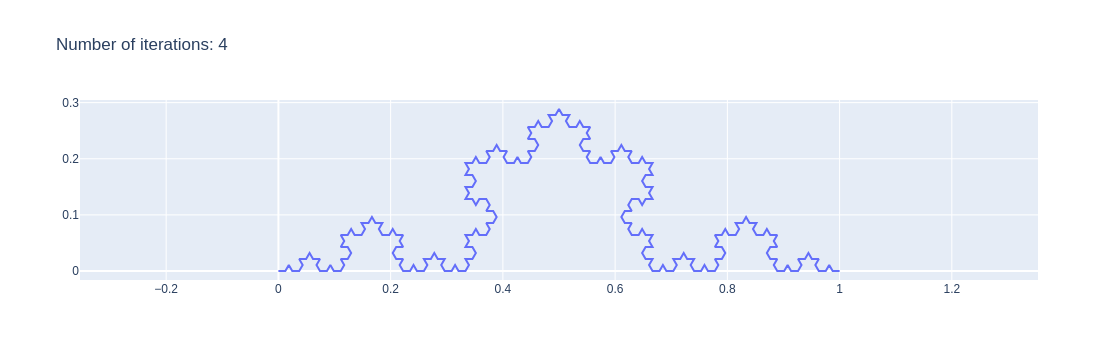

In [121]:
A = (0,0)
B = (1,0)
C = (1/2, sqrt(3)/2)
for i in range(5):
    draw_curve(generate_vertices(A,B,i), f"Number of iterations: {i}")

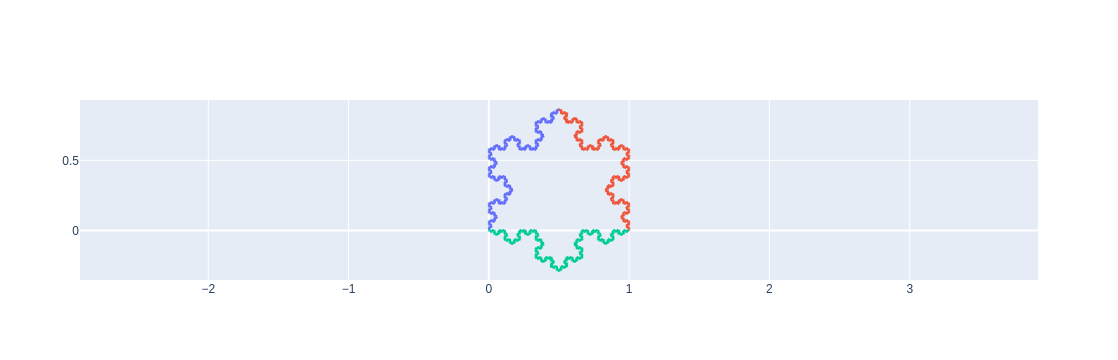

In [123]:
fig = go.Figure()
insert_curve(generate_vertices(A,C,6), fig)
insert_curve(generate_vertices(C,B,6), fig)
insert_curve(generate_vertices(B,A,6), fig)
fig.update_layout(
        xaxis_scaleanchor="y",  
        yaxis_scaleanchor="x",  
        showlegend=False
    )
fig.show()

0.28867513459481287